In [1]:
from data_process.pre_process import *
from model.FCNN import *
import torch
%matplotlib inline

data=Data(6,2)
data.get_data('/remote-home/2230728/project/EMG/myDataset/', 'merge6.mat')
# data.crop_data('/remote-home/2230728/project/EMG/NinaPro/DB2', 'S5_E3_A1.mat')
data.normalise()
data.filter_data(f=(20,50), butterworth_order=4, btype='bandpass')
data.rectify_data()
x,y = data.windowing_data2(200, 20,60000)

Not yet!!!!!!!!!!!!!!!!!!!!
[200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500, 520, 540, 560, 580, 600, 620, 640, 660, 680, 700, 720, 740, 760, 780, 800, 820, 840, 860, 880, 900, 920, 940, 960, 980, 1000, 1020, 1040, 1060, 1080, 1100, 1120, 1140, 1160, 1180, 1200, 1220, 1240, 1260, 1280, 1300, 1320, 1340, 1360, 1380, 1400, 1420, 1440, 1460, 1480, 1500, 1520, 1540, 1560, 1580, 1600, 1620, 1640, 1660, 1680, 1700, 1720, 1740, 1760, 1780, 1800, 1820, 1840, 1860, 1880, 1900, 1920, 1940, 1960, 1980, 2000, 2020, 2040, 2060, 2080, 2100, 2120, 2140, 2160, 2180, 2200, 2220, 2240, 2260, 2280, 2300, 2320, 2340, 2360, 2380, 2400, 2420, 2440, 2460, 2480, 2500, 2520, 2540, 2560, 2580, 2600, 2620, 2640, 2660, 2680, 2700, 2720, 2740, 2760, 2780, 2800, 2820, 2840, 2860, 2880, 2900, 2920, 2940, 2960, 2980, 3000, 3020, 3040, 3060, 3080, 3100, 3120, 3140, 3160, 3180, 3200, 3220, 3240, 3260, 3280, 3300, 3320, 3340, 3360, 3380, 3400, 3420, 3440, 3460, 3480, 3500, 3520, 3540, 356

<Axes: >

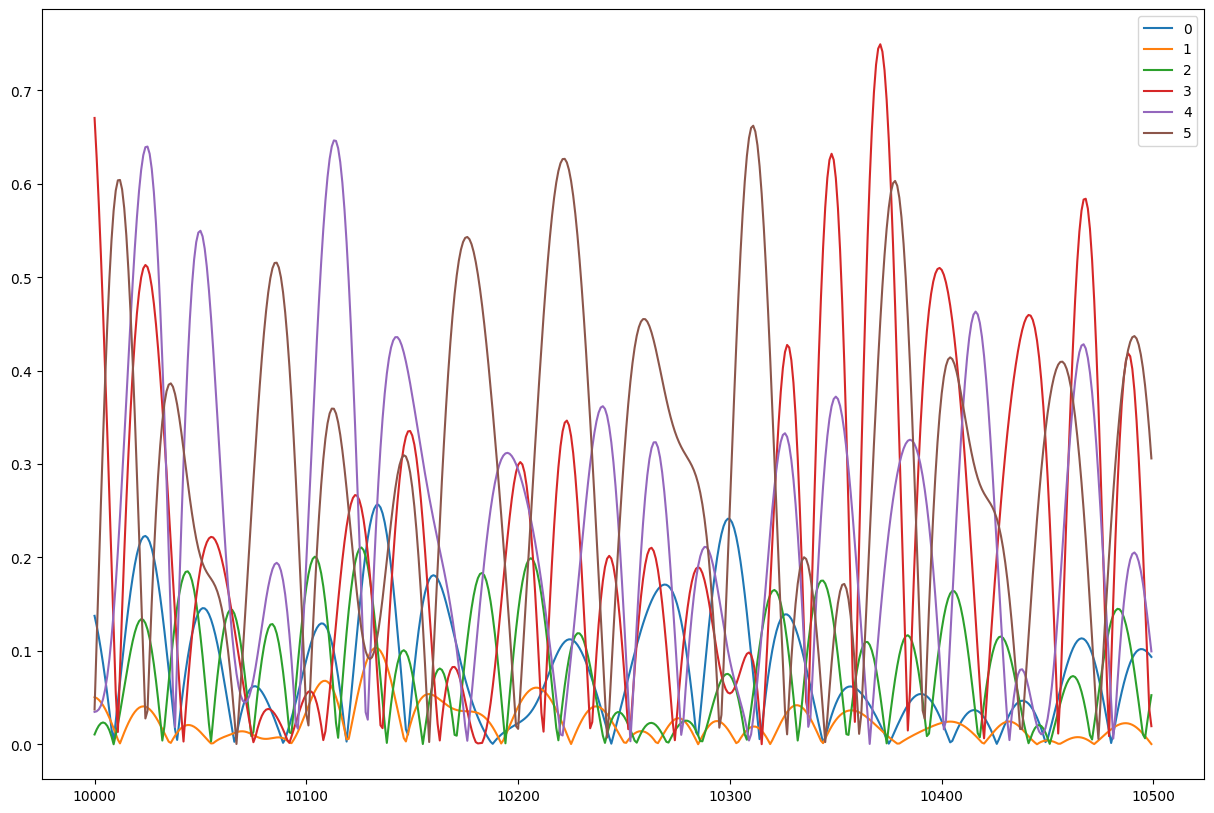

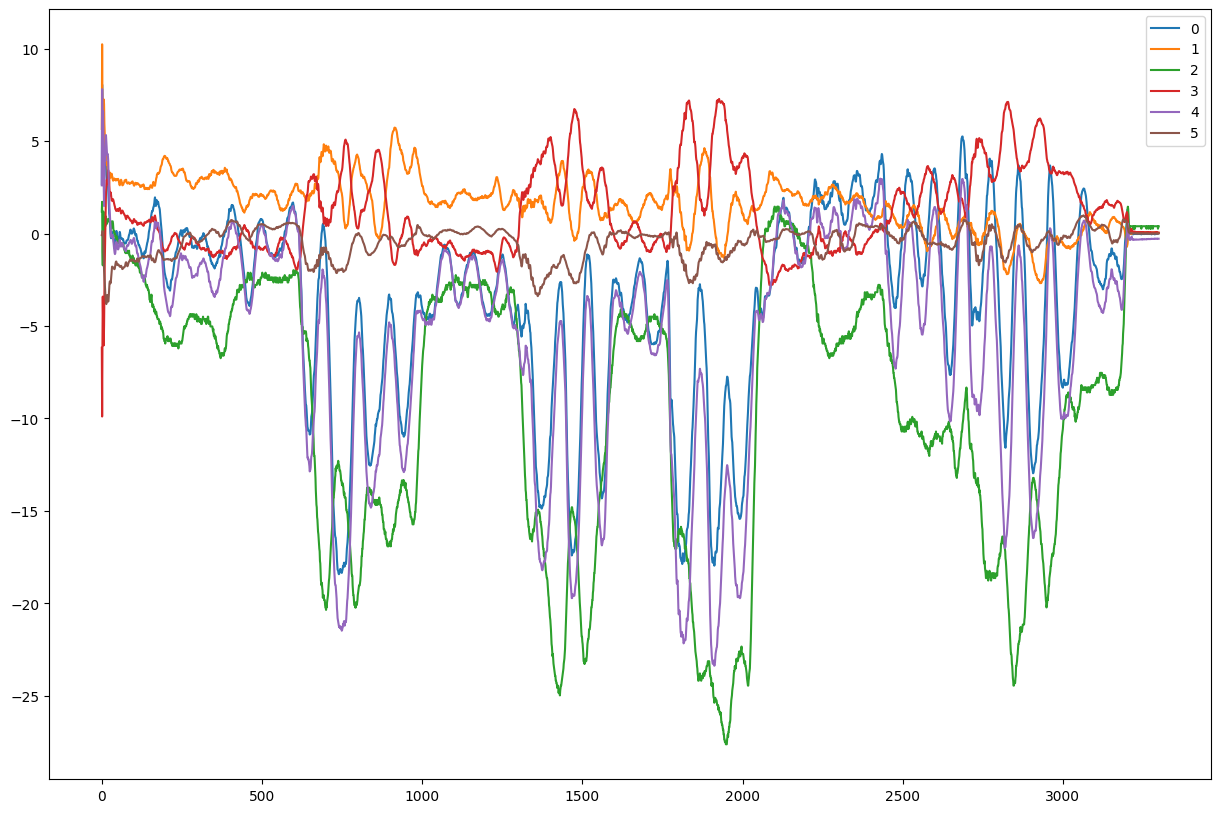

In [2]:
data.emg_signal[10000:10500].plot(figsize = (15,10))
data.force_signal[:].plot(figsize = (15,10))

In [3]:
from data_process.feature import *

feature=feature(x)
feature.time_features_estimation(x, 200, data.emg_raw)
print(feature.time_features_matrix.shape)

(2990, 8)
(2990, 8)


In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model = MyModel(8, 2)
model.to(device)
checkpoint = torch.load('model_path/FCNN-b32-28:04:06-i8o2.pth')
model.load_state_dict(checkpoint['net'])
x = feature.time_features_matrix.astype(np.float32)
x = torch.tensor(x).to(device)
# y_c1 = y[:,0,None].astype(np.float32)
# y_c1 = torch.tensor(y_c1).to(device)
y = y.astype(np.float32)
y = torch.tensor(y).to(device)
res = result(model, x, y)

cuda
torch.Size([2990, 8])
torch.Size([1, 2])
torch.Size([1, 2])
torch.Size([1, 2])
torch.Size([1, 2])
torch.Size([1, 2])
torch.Size([1, 2])
torch.Size([1, 2])
torch.Size([1, 2])
torch.Size([1, 2])
torch.Size([1, 2])
torch.Size([1, 2])
torch.Size([1, 2])
torch.Size([1, 2])
torch.Size([1, 2])
torch.Size([1, 2])
torch.Size([1, 2])
torch.Size([1, 2])
torch.Size([1, 2])
torch.Size([1, 2])
torch.Size([1, 2])
torch.Size([1, 2])
torch.Size([1, 2])
torch.Size([1, 2])
torch.Size([1, 2])
torch.Size([1, 2])
torch.Size([1, 2])
torch.Size([1, 2])
torch.Size([1, 2])
torch.Size([1, 2])
torch.Size([1, 2])
torch.Size([1, 2])
torch.Size([1, 2])
torch.Size([1, 2])
torch.Size([1, 2])
torch.Size([1, 2])
torch.Size([1, 2])
torch.Size([1, 2])
torch.Size([1, 2])
torch.Size([1, 2])
torch.Size([1, 2])
torch.Size([1, 2])
torch.Size([1, 2])
torch.Size([1, 2])
torch.Size([1, 2])
torch.Size([1, 2])
torch.Size([1, 2])
torch.Size([1, 2])
torch.Size([1, 2])
torch.Size([1, 2])
torch.Size([1, 2])
torch.Size([1, 2])
torc

<Axes: >

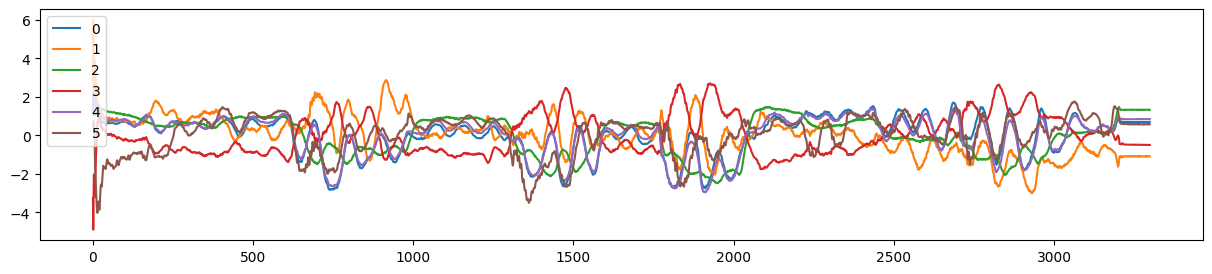

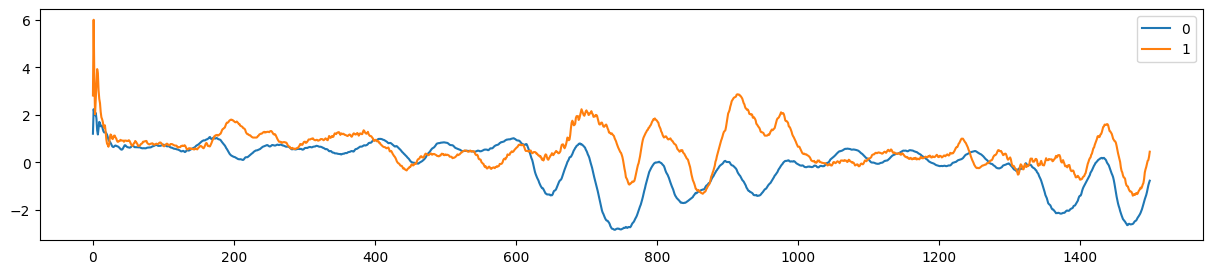

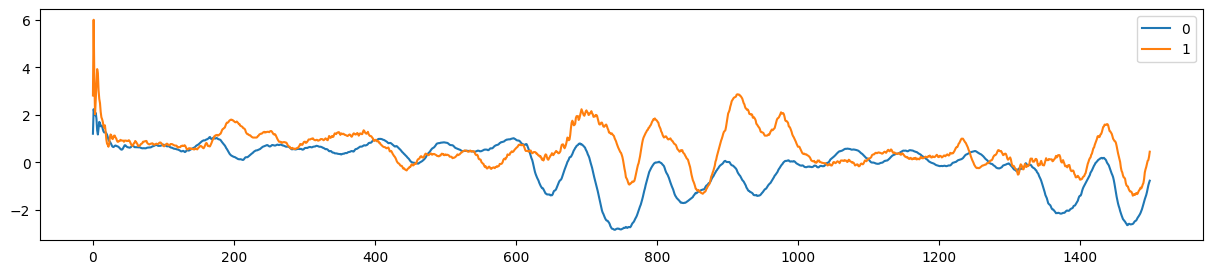

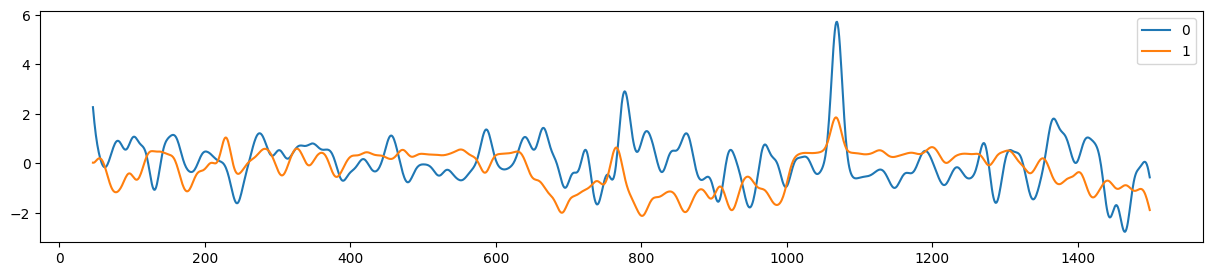

In [9]:
# pd.DataFrame(y)[:].plot(figsize=(15,10))
# pd.DataFrame(res.iloc[0:4000,:]).plot(figsize=(15,10))
# res = res.rolling(window=30).mean()
data.force_signal[:].plot(figsize = (15,3))
pd.DataFrame(data.force_signal.iloc[:1500,:2]).plot(figsize=(15,3))
scaler = StandardScaler(with_mean=True,with_std=True,copy=False).fit(data.force_signal.iloc[:, :])
scaled = pd.DataFrame(scaler.transform(data.force_signal.iloc[:,:]))
pd.DataFrame(scaled.iloc[:1500,:2]).plot(figsize=(15,3))
res = res.rolling(window=10).mean()
res[:1500].plot(figsize = (15,3))